In [1]:
exec(open("../header.py", "r").read())

In [9]:
from skimage.io import imread, imshow
from skimage import img_as_float
from sklearn.cluster import KMeans

In [64]:
img = imread(data_path/"parrots.jpg")
img = img_as_float(img)

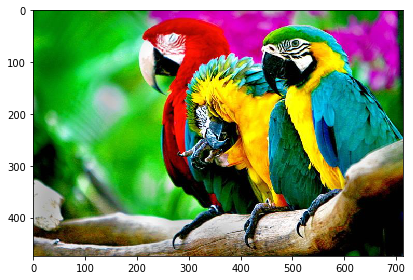

In [69]:
imshow(img)

In [66]:
def to_features(img):
    return img.reshape(-1, 3)

In [67]:
def from_features(X, shape):
    return X.reshape(*shape)

In [68]:
X = to_features(img)

In [70]:
models = {}
clust_number = [i for i in range(1,21)]
for i in clust_number:
    models[i] = KMeans(random_state=241, init="k-means++", n_clusters=i).fit(X)

In [112]:
def PSNR(pred, base):
    return 10*sp.log10(sp.amax(base)*sp.prod(base.shape)/sp.sum((pred - base)**2))

In [113]:
def transform_X(X, model, aggr):
    new_X_aggr = sp.empty_like(X)
    labels = model.predict(X)
    for clust_id in range(model.get_params()["n_clusters"]):
        mask = labels == clust_id
        new_X_aggr[mask] = aggr(X[mask])
    return new_X_aggr

In [131]:
@answer
def best_psnr(fout):
    psnrs = {}
    for i, model in models.items():
        new_X_mean = transform_X(X, model, lambda arr: sp.mean(arr, axis=0))
        new_X_median = transform_X(X, model, lambda arr: sp.median(arr, axis=0))
        psnrs[i] = (PSNR(new_X_mean, X), PSNR(new_X_median, X))
    df = pd.DataFrame.from_dict(psnrs, orient="index", columns=["mean", "median"])
    display(df)
    num = (df > 20).any(axis=1).idxmax()
    fout.write(f"{num}")
best_psnr()

,mean,median
1,9.818836,9.427840
2,12.080177,11.655077
3,13.153487,12.774948
4,14.367818,14.005929
5,15.527146,15.177909
6,16.543994,16.051177
7,17.640993,17.339368
8,18.436829,18.137971
9,19.112673,18.813887
10,19.640757,19.417473


*** OUTPUT (output/01_best_psnr.dat) ***
11
